In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import keras
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping


In [14]:
X = pd.read_csv("inputs.csv")
Y = pd.read_csv("outputs.csv")


In [15]:
X

,season,home/visitor,day,day_of_week,month,games_played,cumulative_wins,cumulative_win_rate,cumulative_score,average_score,...,team-LA Clippers,opponent-LA Clippers,team-Charlotte,opponent-Charlotte,team-Boston,opponent-Boston,team-Oklahoma City,opponent-Oklahoma City,team-Brooklyn,opponent-Brooklyn
0,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.966667,0.166667,0.818182,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37099,1.0,0.0,0.500000,0.000000,0.000000,0.530864,0.338028,0.558140,0.502194,0.798339,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37100,1.0,1.0,0.500000,0.000000,0.000000,0.518519,0.183099,0.309524,0.514002,0.836565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37101,1.0,1.0,0.500000,0.000000,0.000000,0.543210,0.267606,0.431818,0.524660,0.815097,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37102,1.0,1.0,0.500000,0.000000,0.000000,0.543210,0.309859,0.500000,0.527795,0.819968,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
Y

,moneyLine,total,spread,secondHalfTotal,score
0,0.671795,0.515528,0.523256,0.524390,0.975165
1,0.676410,0.354037,0.616279,0.365854,-0.829566
2,0.654872,0.354037,0.383721,0.365854,-0.679171
3,0.594872,0.236025,0.197674,0.268293,0.147997
4,0.712821,0.236025,0.802326,0.268293,-0.528777
...,...,...,...,...,...
37099,0.671795,0.596273,0.534884,0.548780,1.426347
37100,0.625641,0.751553,0.209302,0.829268,2.403910
37101,0.660513,0.596273,0.465116,0.548780,1.275953
37102,0.657692,0.763975,0.406977,0.853659,1.576742


In [17]:
X = np.asarray(X).astype('float32')
Y = np.asarray(Y).astype('float32')

In [18]:
X

array([[0.        , 0.        , 0.96666664, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.96666664, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.96666664, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [19]:
Y

array([[ 0.6717949 ,  0.51552796,  0.5232558 ,  0.5243902 ,  0.97516483],
       [ 0.67641026,  0.35403726,  0.61627907,  0.36585367, -0.8295657 ],
       [ 0.6548718 ,  0.35403726,  0.38372093,  0.36585367, -0.6791715 ],
       ...,
       [ 0.6605128 ,  0.5962733 ,  0.4651163 ,  0.5487805 ,  1.2759533 ],
       [ 0.6576923 ,  0.76397514,  0.40697673,  0.85365856,  1.5767417 ],
       [ 0.6594872 ,  0.7950311 ,  0.43023255,  0.74390244,  1.7271359 ]],
      dtype=float32)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, shuffle = False)

In [21]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, shuffle = False)

In [22]:
x_train.shape

(20777, 80)

In [23]:
x_val.shape

(5195, 80)

In [24]:
y_train.shape[1]

5

In [33]:
model = Sequential()
model.add(Dense(units = 32, activation = 'relu', input_dim = x_train.shape[1]))
model.add(Dense(units = 16, activation = 'relu'))
#model.add(Dense(units = 8, activation = 'relu'))
model.add(Dense(units = y_train.shape[1]))

model.compile(optimizer = 'adam', loss = 'mse')

In [34]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=2,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

In [35]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), callbacks = [early_stopping], epochs = 100, batch_size = 16)

Epoch 1/100
1299/1299 [==============================] - 3s 2ms/step - loss: 0.1676 - val_loss: 0.1957
Epoch 2/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1525 - val_loss: 0.2073
Epoch 3/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1501 - val_loss: 0.1942
Epoch 4/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1470 - val_loss: 0.1863
Epoch 5/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1437 - val_loss: 0.1806
Epoch 6/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1411 - val_loss: 0.1803
Epoch 7/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1392 - val_loss: 0.1739
Epoch 8/100
1299/1299 [==============================] - 2s 2ms/step - loss: 0.1378 - val_loss: 0.1790
Epoch 9/100
1299/1299 [==============================] - 2s 1ms/step - loss: 0.1363 - val_loss: 0.1903


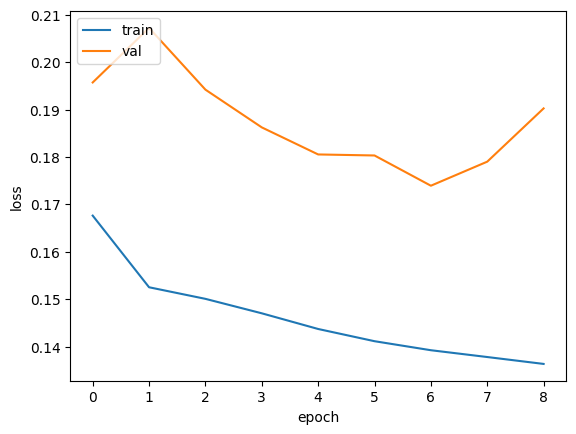

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [37]:
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

348/348 [==============================] - 0s 791us/step


In [38]:
def print_mse(y_true, yhat):
    for i in range(Y.shape[1]):
        print("MSE:")
        print(f"{mean_squared_error(y_true[:, i], yhat[:, i])}")

In [39]:
print_mse(y_train, y_pred_train)

MSE:
0.0008460881072096527
MSE:
0.007463246583938599
MSE:
0.011525983922183514
MSE:
0.007874175906181335
MSE:
0.6522158980369568


In [40]:
print_mse(y_val, y_pred_val)

MSE:
0.0013353590620681643
MSE:
0.016932573169469833
MSE:
0.016032792627811432
MSE:
0.019481368362903595
MSE:
0.8159663677215576


In [41]:
print_mse(y_test, y_pred_test)

MSE:
0.0007087348494678736
MSE:
0.0422649048268795
MSE:
0.02157565765082836
MSE:
0.03840652108192444
MSE:
1.1650141477584839
